# Trafic Light Classificator

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline
fig = plt.figure()


In [10]:
file = cv2.imread('sim_images/frame000000.png')
#new_file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);


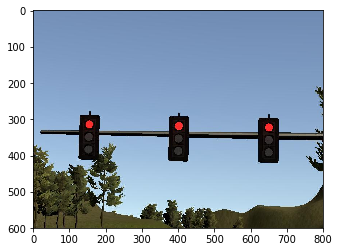

In [12]:
#plt.imshow(file)
#file

## 1. Data Import

In [4]:
X_train = []
x_label = []
for img_class, directory in enumerate(['sim_red_Crop', 'sim_yellow_Crop', 'sim_green_Crop', 'none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)

        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,32))

        X_train.append(resized/255.)
        x_label.append(img_class)
        
        #if (i < 3):
        #    plt.imshow(rgb)
        #    plt.show()
        
X_train = np.array(X_train)
x_label = np.array(x_label)

In [14]:
x_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

## 2. CNN

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers

In [6]:
categorical_labels = to_categorical(x_label)

In [9]:
# num_classes = 4
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Flatten())

# #model.add(Dense(128, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(num_classes, activation='softmax'))

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))

In [8]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [9]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [10]:
model.fit(X_train, categorical_labels, batch_size=32, epochs=30, verbose=True, validation_split=0.1, shuffle=True)

Train on 203 samples, validate on 23 samples
Epoch 1/30
203/203 [==============================] - 0s - loss: 1.0452 - acc: 0.4236 - val_loss: 1.2150 - val_acc: 0.6957
Epoch 2/30
203/203 [==============================] - 0s - loss: 0.5470 - acc: 0.8966 - val_loss: 0.6503 - val_acc: 1.0000
Epoch 3/30
203/203 [==============================] - 0s - loss: 0.2620 - acc: 0.9704 - val_loss: 0.3801 - val_acc: 1.0000
Epoch 4/30
203/203 [==============================] - 0s - loss: 0.1025 - acc: 0.9901 - val_loss: 0.1278 - val_acc: 1.0000
Epoch 5/30
203/203 [==============================] - 0s - loss: 0.0449 - acc: 1.0000 - val_loss: 0.0585 - val_acc: 1.0000
Epoch 6/30
203/203 [==============================] - 0s - loss: 0.0229 - acc: 1.0000 - val_loss: 0.0281 - val_acc: 1.0000
Epoch 7/30
203/203 [==============================] - 0s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 8/30
203/203 [==============================] - 0s - loss: 0.0085 - acc: 1.0000 - val_lo

In [11]:
score = model.evaluate(X_train, categorical_labels, verbose=0)

In [12]:
print(score)

[0.0005514735615589713, 1.0]


In [13]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

 32/226 [===>..........................] - ETA: 0s0 [9.9952483e-01 1.3411649e-06 3.9874599e-04 7.5038850e-05] [1. 0. 0. 0.]
1 [9.9952447e-01 1.3422904e-06 3.9920700e-04 7.5066528e-05] [1. 0. 0. 0.]
2 [9.9980122e-01 5.8818785e-07 1.3720362e-04 6.0990267e-05] [1. 0. 0. 0.]
3 [9.9980122e-01 5.8818785e-07 1.3720362e-04 6.0990267e-05] [1. 0. 0. 0.]
4 [9.9952483e-01 1.3411649e-06 3.9874599e-04 7.5038850e-05] [1. 0. 0. 0.]
5 [9.9980122e-01 5.8818785e-07 1.3720362e-04 6.0990267e-05] [1. 0. 0. 0.]
6 [9.9952483e-01 1.3411649e-06 3.9874599e-04 7.5038850e-05] [1. 0. 0. 0.]
7 [9.9952483e-01 1.3411649e-06 3.9874599e-04 7.5038850e-05] [1. 0. 0. 0.]
8 [9.9952435e-01 1.3421327e-06 3.9926331e-04 7.5092219e-05] [1. 0. 0. 0.]
9 [9.9980110e-01 5.9049489e-07 1.3730192e-04 6.1069353e-05] [1. 0. 0. 0.]
10 [9.9952435e-01 1.3421327e-06 3.9926331e-04 7.5092219e-05] [1. 0. 0. 0.]
11 [9.9952483e-01 1.3411649e-06 3.9874599e-04 7.5038850e-05] [1. 0. 0. 0.]
12 [9.9952435e-01 1.3421327e-06 3.9926331e-04 7.5092219e-05]

134 [2.3378800e-05 3.0206411e-07 9.9990094e-01 7.5332217e-05] [0. 0. 1. 0.]
135 [1.4721682e-05 3.9012946e-07 9.9990761e-01 7.7185847e-05] [0. 0. 1. 0.]
136 [1.9880938e-05 2.9236409e-07 9.9993348e-01 4.6306723e-05] [0. 0. 1. 0.]
137 [1.2306396e-04 9.0272897e-07 9.9985635e-01 1.9684730e-05] [0. 0. 1. 0.]
138 [2.9077853e-06 3.9303854e-06 9.9996614e-01 2.7098176e-05] [0. 0. 1. 0.]
139 [3.8430721e-06 3.8255566e-06 9.9996066e-01 3.1696458e-05] [0. 0. 1. 0.]
140 [3.7909820e-06 3.0628748e-06 9.9996364e-01 2.9463625e-05] [0. 0. 1. 0.]
141 [2.0816449e-06 9.8472438e-04 9.9875188e-01 2.6137006e-04] [0. 0. 1. 0.]
142 [1.5261422e-06 4.8043753e-04 9.9930739e-01 2.1058855e-04] [0. 0. 1. 0.]
143 [4.0379082e-06 7.3419847e-03 9.9171829e-01 9.3564193e-04] [0. 0. 1. 0.]
144 [2.3995644e-06 2.3464400e-03 9.9723852e-01 4.1269587e-04] [0. 0. 1. 0.]
145 [1.2080529e-05 4.3472960e-07 9.9993503e-01 5.2473424e-05] [0. 0. 1. 0.]
146 [3.1176232e-06 3.3016522e-06 9.9996424e-01 2.9358882e-05] [0. 0. 1. 0.]
147 [3.10286

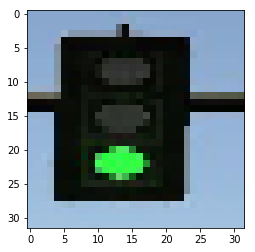

In [15]:
plt.imshow(X_train[150])

In [16]:
import h5py
model.save('classifier_sim.h5')

In [20]:
prediction[183]

array([0.00570397, 0.00648432, 0.9368034 , 0.05100834], dtype=float32)

In [22]:
prediction[183].tolist()

[0.005703971721231937,
 0.006484320852905512,
 0.93680340051651,
 0.05100833997130394]